## Example 1: Modeling a Flare

In this notebook we will walk through how to use the flare template to fit & model a flare from a given light curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import astropy
import lightkurve as lk
from scipy.optimize import minimize
from lightkurve import search_lightcurvefile

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 18
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

Using lightkurve to read in one sector of data for the M4 star GJ 1243

In [3]:
target = '9726699'
gj1243 = lk.search_lightcurve(target,exptime=120,sector=14)

In [4]:
lc = gj1243.download().PDCSAP_FLUX

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

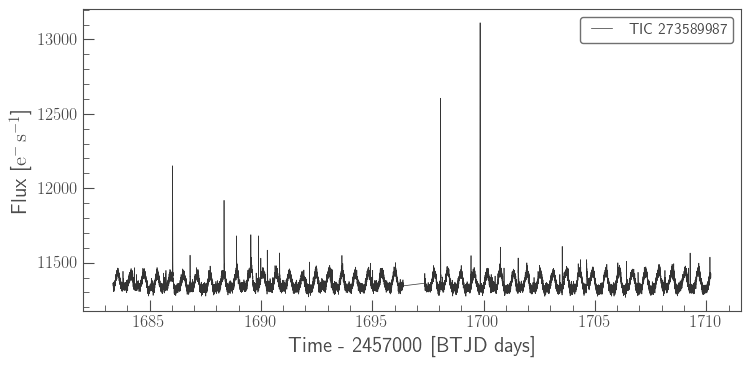

In [5]:
lc.plot()

This star has MANY flares, here we will be zooming in on just one

In [6]:
lcmedian = (lc['pdcsap_flux']/np.nanmedian(lc['pdcsap_flux']))-1

Text(0, 0.5, 'Relative Flux')

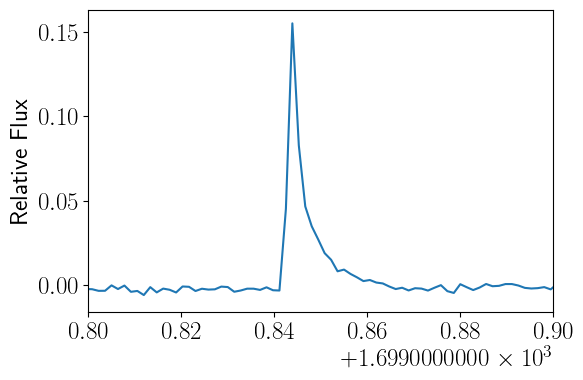

In [7]:
plt.plot(lc.time.btjd,lcmedian)
xmin = 1699.8
xmax = 1699.9
plt.xlim(xmin,xmax)
plt.ylabel('Relative Flux')
#plt.xlabel('Time [BTJD]')

Now we will use curvefit to fit the flare and our new flare template to model this flare event

In [8]:
import sys  
sys.path.append('/Users/lupitatovar/Llamaradas-Estelares/') #Edit this to your own file path
from Flare_model import flare_model

In [9]:
x_mask = np.where((lc.time.btjd > xmin) & (lc.time.btjd < xmax))[0]

In [10]:
xfit = lc.time.btjd[x_mask] - 1.699e+03 # subtract off constant to make x axis look nicer (units of days)
yfit = lcmedian[x_mask]

Now we use curvefit to fit this flare

In [11]:
init_vals=[0.843, 0.005, 0.2] #[tpeak, FWHM, amp]
popt, pcov = curve_fit(flare_model, xfit,yfit, p0=init_vals,maxfev=10000)

In [12]:
print(popt)

[0.84308955 0.00149461 0.25678137]


Text(0, 0.5, 'Relative Flux')

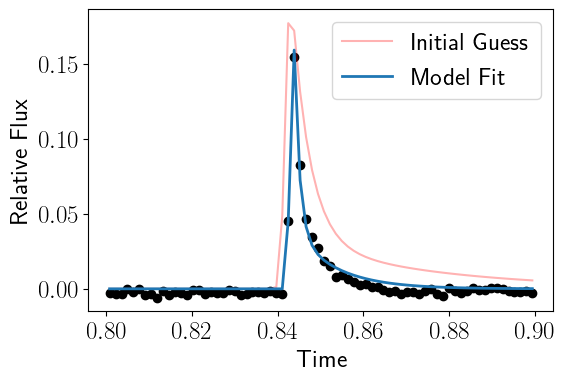

In [13]:
plt.scatter(xfit,yfit,color='black')
plt.plot(xfit, flare_model(xfit, *init_vals),color='red', label='Initial Guess', alpha=0.3)
plt.plot(xfit, flare_model(xfit, *popt),color='C0', label='Model Fit', lw=2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Relative Flux')


And we fit the flare!

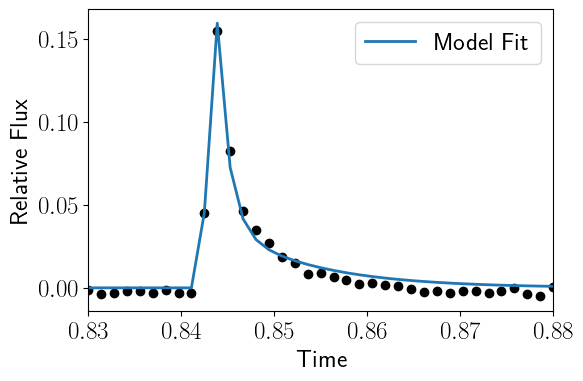

In [14]:
plt.scatter(xfit,yfit,color='black')
plt.plot(xfit, flare_model(xfit, *popt),color='C0', label='Model Fit', lw=2)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.xlim(0.83,0.88)
plt.legend()

The flare model also lets you upsample your data by setting upsample = True, see example below. 

Here we upsample by 10 (uptime=10) which is the default but can be switched to a different value of your choosing

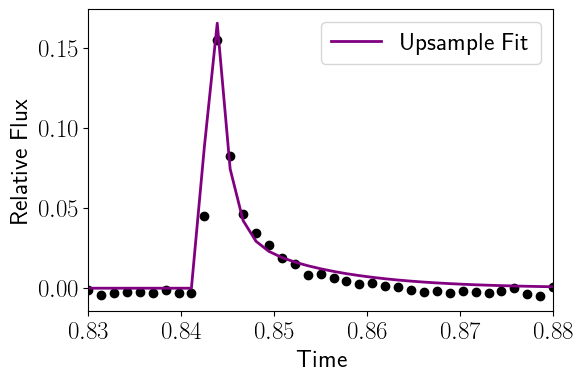

In [15]:
plt.scatter(xfit,yfit,color='black')
plt.plot(xfit, flare_model(xfit, *popt,uptime=50,upsample=True),color='purple', label='Upsample Fit', lw=2)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.xlim(0.83,0.88)
plt.legend()

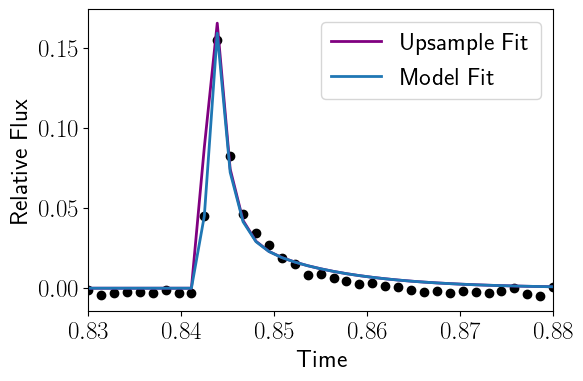

In [16]:
plt.scatter(xfit,yfit,color='black')
plt.plot(xfit, flare_model(xfit, *popt,uptime=50,upsample=True),color='purple', label='Upsample Fit', lw=2)
plt.plot(xfit, flare_model(xfit, *popt),color='C0', label='Model Fit', lw=2)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.xlim(0.83,0.88)
plt.legend()